<a href="https://colab.research.google.com/github/mansipatel2508/Network-Intrusion-Detection-with-Feature-Extraction-ML/blob/master/Network_Intrusion_Detection_with_Feature_Extraction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Network Intrusion Detection
The project detects the connection is good or bad based on the various network parameters like connection protocol, destination IP,  souce IP and many more features in the original dataset.
# 1.Problem Statement
This project aims to detects good or bad connection to the network featuing binary classification '0' for good connection and 1 for bad connection. 

**Feature Extraction | Feature Importance Analysis | Feature Selection | Pearson's Coefficient | RFE | Standard Scaler | l1 -l2 Regularization | Pertubation Rank**

Models : Logistic Regression | Nearest Neighbor | Support Vector Machine | Gaussian Naive Bayes | Fully-Connected Neural Networks | Convolutional Neural Networks (CNN)

Project attemps to learn:
* Feature Extraction
* Feature Selection and Feature Importance Analysis
* Apply various Feature importance / selection algorithm like Pearson's coefficient, RFE, Extra Tree Classifier etc.
* Dealing with the huge dataset with having more features/columns
* Compare the model performances before and after applying any feature selection technique/feature extraction
* l1-l2 regularization for Neural Networks
* Visualizing any data to 4D image to feed in the CNN model
* Binary classification converted into multi-classification for comparison
* ROC curve & Confusion Matrix

# 2. Dataset
This database has a wide variety of intrusions collected in a military network environment.

* Preprocessed the data, dropped the rows with null values, unnecessary columns
* Normalized numeric data with zscore normalization
* Labeled the ouput feature
* One hot encoded the categorical data

In [0]:
df.shape

(494020, 42)

In [0]:
#Intial dataset features
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Splitting the data 
* Spliting the data into 75% train - 25% test

# Without Feature Extraction
* With all 42 columns fed to the model (117 after normalization & one-hot encoding & labeling)
* Tried with different parameters for each model

## Logistic Regression

Precision score: 0.9922510930626702
Recall score: 0.9922521086902767
F1 score: 0.99225008633257
Accuracy score: 0.9922521086902767
Log loss score: 0.26760529976259145
[[21819   119]
 [  163 14296]]
Plot of Confusion Matrix


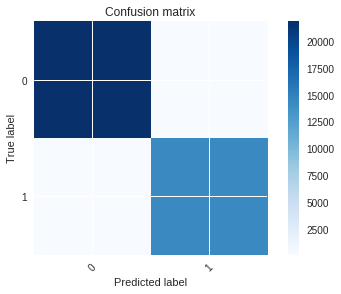

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21938
           1       0.99      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       0.99      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
from sklearn import metrics
y_true = y_test
pred2 = y_pred_log
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,pred2))

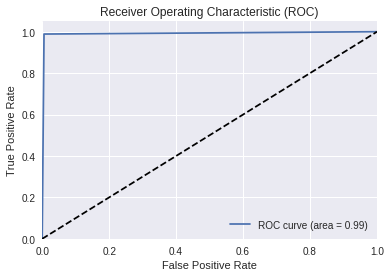

In [0]:
plot_roc(y_pred_log,y_test)

## KNN

Precision score: 0.9990658413434637
Recall score: 0.9990658570761326
F1 score: 0.9990658460602845
Accuracy score: 0.9990658570761326
Log loss score: 0.03226450506871123
[[21922    16]
 [   18 14441]]
Plot of Confusion Matrix


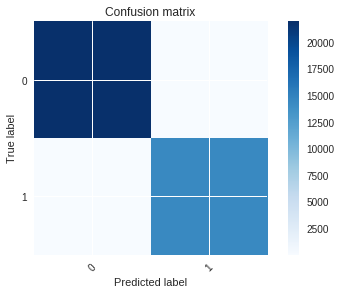

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

   micro avg       1.00      1.00      1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test
pred2 = y_pred_knn
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,pred2))

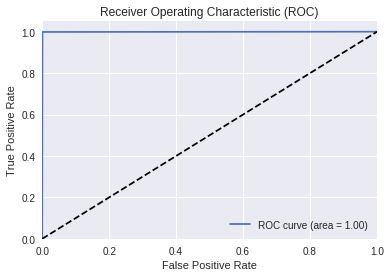

In [0]:
plot_roc(y_pred_knn,y_test)

## SVM

Precision score: 0.996950095417031
Recall score: 0.9969502981014918
F1 score: 0.9969500639645984
Accuracy score: 0.9969502981014918
Log loss score: 0.10533404841358358
[[21889    49]
 [   62 14397]]
Plot of Confusion Matrix


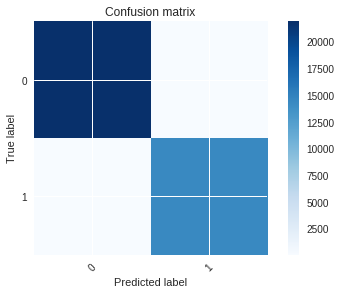

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

   micro avg       1.00      1.00      1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
from sklearn import metrics
y_true = y_test
pred2 = y_pred_svm
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))

score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, pred2)#this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,pred2))

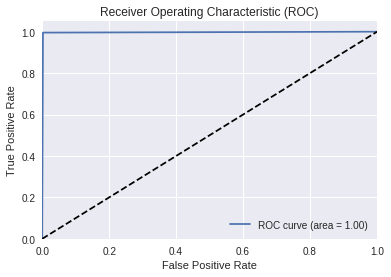

In [0]:
plot_roc(y_pred_svm,y_test)

## GNB

Precision score: 0.9261079309121599
Recall score: 0.9178503722834299
F1 score: 0.9159255149842488
Accuracy score: 0.9178503722834299
Log loss score: 2.837349885411387
[[21835   103]
 [ 2887 11572]]
Plot of Confusion Matrix


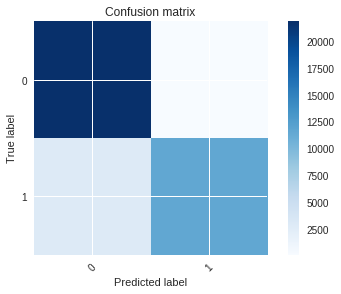

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21938
           1       0.99      0.80      0.89     14459

   micro avg       0.92      0.92      0.92     36397
   macro avg       0.94      0.90      0.91     36397
weighted avg       0.93      0.92      0.92     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test
pred2 = y_pred_gnb
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, pred2)
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,pred2))

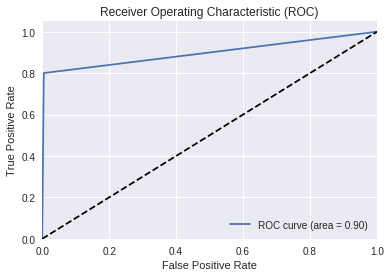

In [0]:
plot_roc(y_pred_gnb,y_test)

## Fully Connected Nueral Network
The paramter tuned best model performance was as follows.

Precision score: 0.9986262343025348
Recall score: 0.9986262604060774
F1 score: 0.9986262442063006
Accuracy score: 0.9979668654009946
Log loss score: 0.047447811909879796
[[21914    24]
 [   26 14433]]
Plot of Confusion Matrix


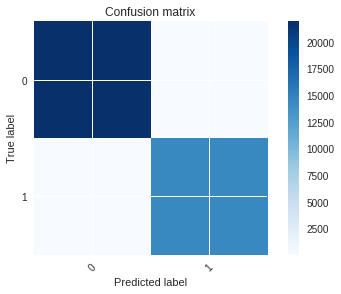

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

   micro avg       1.00      1.00      1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
#the bset classification model for 5 stars
#loading the best saved model
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"neural_project3.hdf5"))
predc = model2.predict(x_test01)
predc = np.argmax(predc,axis=1)
y_true = np.argmax(y_test01,axis=1)
score = metrics.precision_score(y_true, predc, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predc, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, predc, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, predc)

print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predc)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,predc))

## CNN
* Represented the non-image data as image fed to the Conv2D model

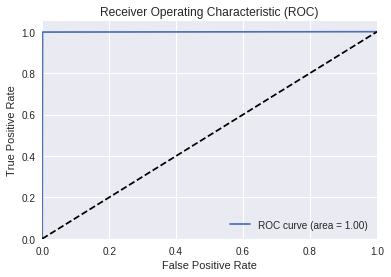

In [0]:
plot_roc(predc,y_true)

Precision score: 0.9985165556901177
Recall score: 0.9985163612385636
F1 score: 0.9985162034101522
Accuracy score: 0.9973624199796687
Log loss score: 0.09110041223510992
[[21920    18]
 [   36 14423]]
Plot of Confusion Matrix


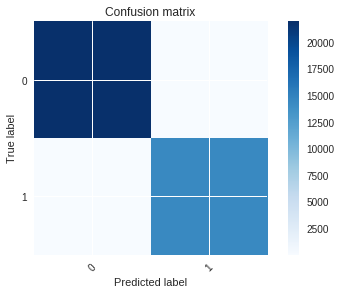

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

   micro avg       1.00      1.00      1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn import metrics
from keras.models import load_model
model3 = load_model(os.path.join(save_path,"cnn_project3.hdf5"))
predcn = model3.predict(x_test2)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test2,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.accuracy_score(y_true, pred2)
print("Accuracy score: {}".format(score))
score = metrics.log_loss(y_true, pred2)
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['0','1'])
plt.show()
print(classification_report(y_true,predcn))

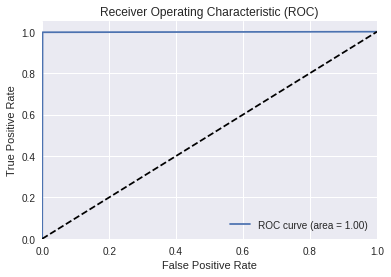

In [0]:
plot_roc(predcn,y_true)

# With Feature Extraction For every model

## Feature Importance Analysis
## Pearson's Coefficient Correlation
* The Pearson's Coefficient Correlation shows how correlated the output column is with every other feature in the dataset.

* Thus filters out which features are more corelated to the output. (117 features)
* Selected the features to a certain threshold and split the data in to 75-25 for train - test

## LR
* Tried only with PCC and applied RFE on top of it to still observe the difference

Precision score: 0.9838068894923453
Recall score: 0.9837074484160783
F1 score: 0.983674752168952
[[21804   134]
 [  459 14000]]
Plot of Confusion Matrix


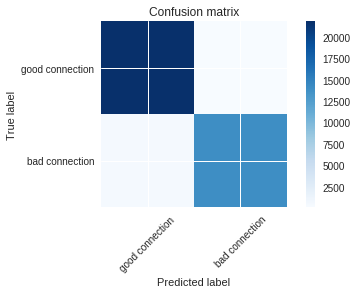

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     21938
           1       0.99      0.97      0.98     14459

   micro avg       0.98      0.98      0.98     36397
   macro avg       0.98      0.98      0.98     36397
weighted avg       0.98      0.98      0.98     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test
pred2 = y_pred_log
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_lr = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_lr))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,pred2))

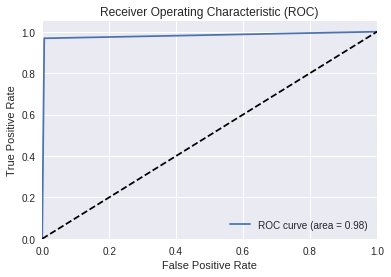

In [0]:
plot_roc(y_pred_log,y_test)

## LR with RFE

Precision score: 0.983149633381547
Recall score: 0.9829656290353601
F1 score: 0.9829210865178606
[[21837   101]
 [  519 13940]]
Plot of Confusion Matrix


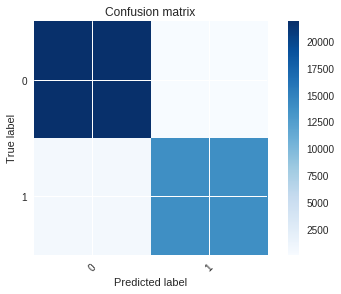

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     21938
           1       0.99      0.96      0.98     14459

   micro avg       0.98      0.98      0.98     36397
   macro avg       0.98      0.98      0.98     36397
weighted avg       0.98      0.98      0.98     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test1
pred2 = y_pred_log1
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_lr1))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,pred2))

##KNN
* Best K value
* Tried with Standard Scaler on KNN, turns out no imptovement

Text(0, 0.5, 'Error Rate')

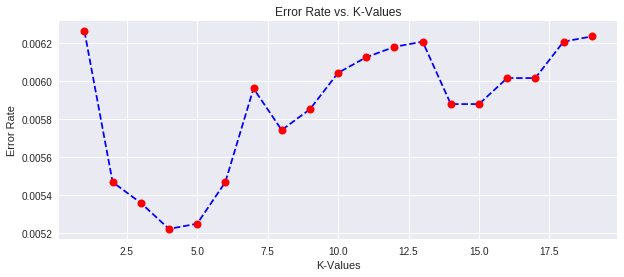

In [0]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Precision score: 0.9948074074143236
Recall score: 0.9947797895430942
F1 score: 0.9947749444064469
[[21920    18]
 [  172 14287]]
Plot of Confusion Matrix


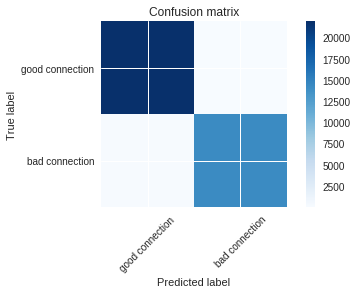

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21938
           1       1.00      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       1.00      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test
pred2 = y_pred_knn2
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_knn2 = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_knn2))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,pred2))

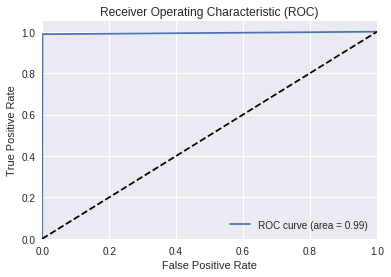

In [0]:
plot_roc(y_pred_knn2,y_test)

##SVM
* Tried with best C value

Text(0, 0.5, 'Error Rate')

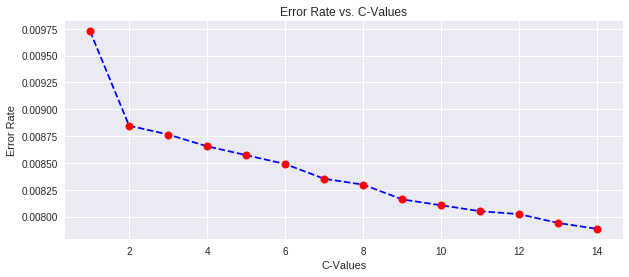

In [0]:
# Configure and plot error rate over C values
plt.figure(figsize=(10,4))
plt.plot(range(1,15), error_rate2, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. C-Values')
plt.xlabel('C-Values')
plt.ylabel('Error Rate')

In [0]:
#import, instantiate, fit and predict the data
from sklearn.svm import SVC
from sklearn import metrics
#svm svc
svm_model2 = SVC(C=14)

svm_model2.fit(x_train, y_train)

y_pred_svm2 = svm_model2.predict(x_test)
score_svm2 = metrics.f1_score(y_test, y_pred_svm2, average= "weighted")
print("F1 score: {}".format(score_svm2))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1 score: 0.9921092999356943


[[21852    86]
 [  201 14258]]
Plot of Confusion Matrix


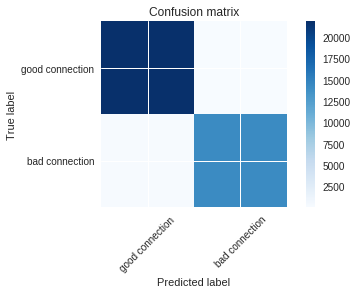

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn import svm, datasets
cm = confusion_matrix(y_test,y_pred_svm2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()

##GNB

Precision score: 0.9265566538007114
Recall score: 0.9178503722834299
F1 score: 0.9158705298699554
[[21865    73]
 [ 2917 11542]]
Plot of Confusion Matrix


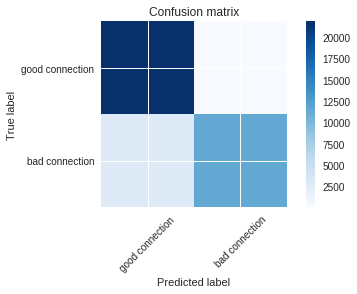

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21938
           1       0.99      0.80      0.89     14459

   micro avg       0.92      0.92      0.92     36397
   macro avg       0.94      0.90      0.91     36397
weighted avg       0.93      0.92      0.92     36397



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test
pred2 = y_pred_gnb
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,pred2))

## GNB with Feature Importance
* Used Extra Tree Classifier and less features than above
* Got almost same result

In [0]:
score_gnb1 = metrics.f1_score(y_test2, y_pred_gnb1, average= "weighted")
print("F1 score: {}".format(score_gnb1))

F1 score: 0.9111405862926503


## Fully Connected Nueral Network
* Tried several models with parameter tuning used checkpoints and earlystopping

Precision score: 0.9937326496305225
Recall score: 0.9937082726598346
F1 score: 0.9937025492122233
Log loss score: 0.21730942052186605
[[21899    39]
 [  190 14269]]
Plot of Confusion Matrix


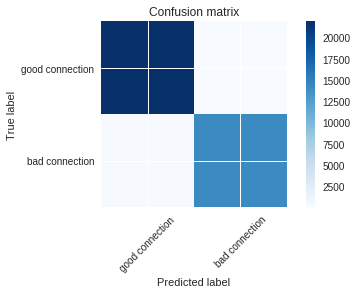

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21938
           1       1.00      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       0.99      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
#the bset classification model for 5 stars
#loading the best saved model
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"neural_project3.hdf5"))
predc = model2.predict(x_test01)
predc = np.argmax(predc,axis=1)
y_true = np.argmax(y_test01,axis=1)
score = metrics.precision_score(y_true, predc, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predc, average= "weighted")
print("Recall score: {}".format(score))
score_nn1 = metrics.f1_score(y_true, predc, average= "weighted")
print("F1 score: {}".format(score_nn1))
score = metrics.log_loss(y_true, predc) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predc)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,predc))

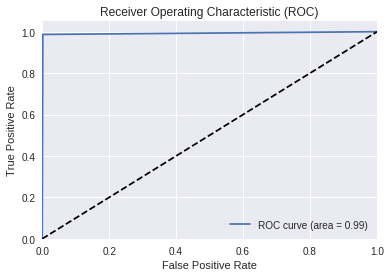

In [0]:
plot_roc(predc,y_true)

##feature importance
* Calculated Pertubation rank for tried features
* Got the almost same accuracy with less features

Precision score: 0.9935140482694839
Recall score: 0.993488474324807
F1 score: 0.993482390539483
Log loss score: 0.22490103000490438
[[21897    41]
 [  196 14263]]
Plot of Confusion Matrix


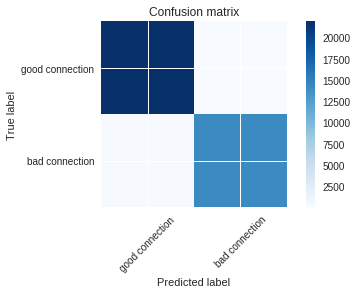

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21938
           1       1.00      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       0.99      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:

#loading the best saved model
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"neural_project3.hdf5"))
predc = model2.predict(x_test01)
predc = np.argmax(predc,axis=1)
y_true = np.argmax(y_test01,axis=1)
score = metrics.precision_score(y_true, predc, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predc, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, predc, average= "weighted")
print("F1 score: {}".format(score))
score = metrics.log_loss(y_true, predc) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predc)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,predc))

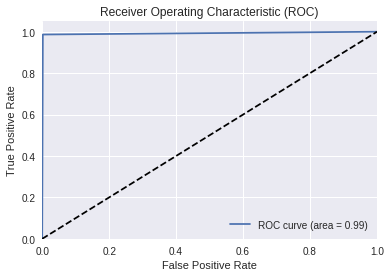

In [0]:
plot_roc(predc,y_true)

##CNN

In [0]:
# evaluate() computes the loss and accuracy
score_CNN = cnn.evaluate(x_test2, y_test2, verbose=0)
print('Test loss: {}'.format(score_CNN[0]))
print('Test accuracy: {}'.format(score_CNN[1]))

Test loss: 0.01918541707273211
Test accuracy: 0.9941203945380114


Precision score: 0.9943498309261105
Recall score: 0.9943127180811605
F1 score: 0.9943066310912189
Log loss score: 0.19643208802121054
[[21923    15]
 [  192 14267]]
Plot of Confusion Matrix


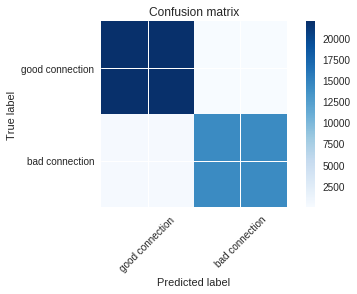

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21938
           1       1.00      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       1.00      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
from sklearn import metrics
from keras.models import load_model
model3 = load_model(os.path.join(save_path,"cnn_project3.hdf5"))
predcn = model3.predict(x_test2)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test2,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score_cn1 = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score_cn1))
score = metrics.log_loss(y_true, predcn) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,predcn))

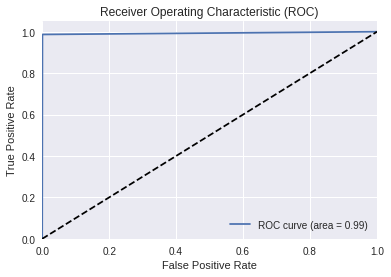

In [0]:
plot_roc(predcn,y_true)

## CNN with l1 l2 regularization technique

Precision score: 0.9941566017405826
Recall score: 0.9941203945380114
F1 score: 0.9941141381535039
Log loss score: 0.20307479574860823
[[21919    19]
 [  195 14264]]
Plot of Confusion Matrix


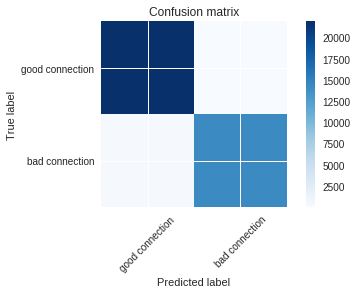

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21938
           1       1.00      0.99      0.99     14459

   micro avg       0.99      0.99      0.99     36397
   macro avg       0.99      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
from sklearn import metrics
from keras.models import load_model
model3 = load_model(os.path.join(save_path,"cnn1_project3.hdf5"))
predcn = model3.predict(x_test2)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test2,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score_cn2 = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score_cn2))
score = metrics.log_loss(y_true, predcn) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['good connection','bad connection'])
plt.show()
print(classification_report(y_true,predcn))

# Converting Binary to Multi classification Problem
* Classifying the attacks into 4 main category of the intrusion which are DoS, Probe, U2L and R2L.
* Again having 40 columns initially - 117 after normalizing, labelling and one hot encoding


In [0]:
df2.shape

(145585, 40)

## Select Percentile and RFC
* Used Select Percentile & fclassif to a certain threshold and chose features
* On those feature Random Forest Classifier was applied
* Spliting the data into train-test as 75-25

## LR

Precision score: 0.9911898852821056
Recall score: 0.9911531170151386
F1 score: 0.9911225024290439
[[21867    17    12     0    42]
 [  172 13509     0     0     0]
 [   32     3   389     0     0]
 [    3     0     0     5     2]
 [   28     9     2     0   305]]
Plot of Confusion Matrix


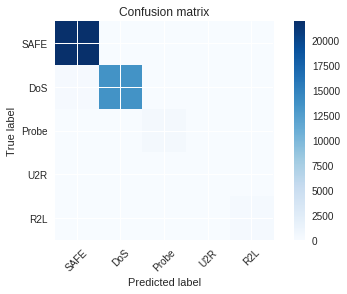

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21938
           1       1.00      0.99      0.99     13681
           2       0.97      0.92      0.94       424
           3       1.00      0.50      0.67        10
           4       0.87      0.89      0.88       344

   micro avg       0.99      0.99      0.99     36397
   macro avg       0.97      0.86      0.89     36397
weighted avg       0.99      0.99      0.99     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test_mc
pred2 = y_pred_logmc
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_lr_mc = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_lr_mc))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,pred2))

##KNN

Precision score: 0.9987251530257909
Recall score: 0.9987361595735912
F1 score: 0.998725425188046
[[21925     2     0     1    10]
 [    3 13678     0     0     0]
 [   12     0   412     0     0]
 [    3     0     0     7     0]
 [   12     2     1     0   329]]
Plot of Confusion Matrix


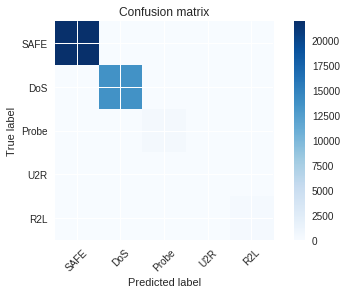

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     13681
           2       1.00      0.97      0.98       424
           3       0.88      0.70      0.78        10
           4       0.97      0.96      0.96       344

   micro avg       1.00      1.00      1.00     36397
   macro avg       0.97      0.93      0.94     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test_mc
pred2 = y_pred_knn_mc
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_knn_mc = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_knn_mc))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,pred2))

##SVM

Precision score: 0.9976738135605803
Recall score: 0.9976646426903316
F1 score: 0.9976516311323359
[[21907     6     2     0    23]
 [    7 13674     0     0     0]
 [   26     0   398     0     0]
 [    2     0     0     7     1]
 [   14     4     0     0   326]]
Plot of Confusion Matrix


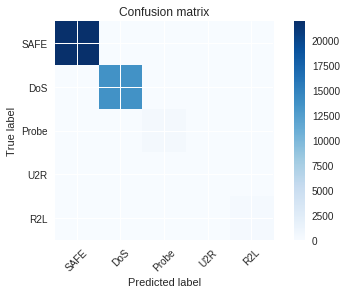

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     13681
           2       0.99      0.94      0.97       424
           3       1.00      0.70      0.82        10
           4       0.93      0.95      0.94       344

   micro avg       1.00      1.00      1.00     36397
   macro avg       0.98      0.92      0.95     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
y_true = y_test_mc
pred2 = y_pred_svm_mc
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_svm_mc = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_svm_mc))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,pred2))

##GNB

Precision score: 0.9718445936358199
Recall score: 0.8777097013490123
F1 score: 0.9170111821909642
[[20308   181   210  1083   156]
 [  216 11029  2379     0    57]
 [    1     3   413     4     3]
 [    0     0     0     9     1]
 [    6     1    22   128   187]]
Plot of Confusion Matrix


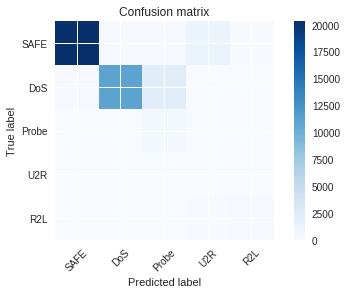

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     21938
           1       0.98      0.81      0.89     13681
           2       0.14      0.97      0.24       424
           3       0.01      0.90      0.01        10
           4       0.46      0.54      0.50       344

   micro avg       0.88      0.88      0.88     36397
   macro avg       0.52      0.83      0.52     36397
weighted avg       0.97      0.88      0.92     36397



In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test_mc
pred2 = y_pred_gnb_mc
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score_gnb_mc = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score_gnb_mc))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,pred2))

##Fully connected Nueral Network

Precision score: 0.9980919830844912
Recall score: 0.9981042393603868
F1 score: 0.9980632340424047
[[21925     1     6     2     4]
 [    4 13677     0     0     0]
 [    6     0   418     0     0]
 [    4     0     0     6     0]
 [   28     2    12     0   302]]
Plot of Confusion Matrix


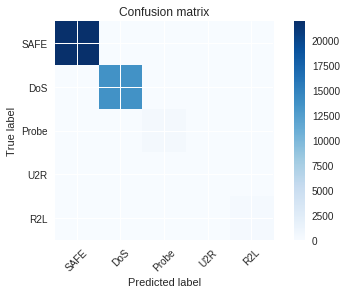

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     13681
           2       0.96      0.99      0.97       424
           3       0.75      0.60      0.67        10
           4       0.99      0.88      0.93       344

   micro avg       1.00      1.00      1.00     36397
   macro avg       0.94      0.89      0.91     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
#the bset classification model for 5 stars
#loading the best saved model
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"neural_project3mc.hdf5"))
predcn = model2.predict(x_test3)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test3,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score_nn_mc = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score_nn_mc))
#score = metrics.log_loss(y_true, predcn) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,predcn))

##CNN

In [0]:
# evaluate() computes the loss and accuracy
score_CNN2 = cnn.evaluate(x_test3, y_test3, verbose=0)
print('Test loss: {}'.format(score_CNN2[0]))
print('Test accuracy: {}'.format(score_CNN2[1]))

Test loss: 0.007435984903608008
Test accuracy: 0.9980767645685084


Precision score: 0.998139885866569
Recall score: 0.9980767645685084
F1 score: 0.9980911084014968
[[21896     3     2     1    36]
 [    3 13678     0     0     0]
 [   10     0   413     1     0]
 [    2     0     0     6     2]
 [    9     1     0     0   334]]
Plot of Confusion Matrix


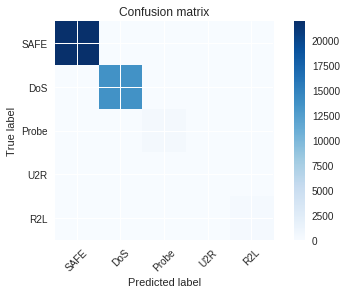

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     13681
           2       1.00      0.97      0.98       424
           3       0.75      0.60      0.67        10
           4       0.90      0.97      0.93       344

   micro avg       1.00      1.00      1.00     36397
   macro avg       0.93      0.91      0.92     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn import metrics
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
model3 = load_model(os.path.join(save_path,"cnn_project3mc.hdf5"))
predcn = model3.predict(x_test3)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test3,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score_cnmc = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score_cnmc))
#score = metrics.log_loss(y_true, predcn) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,predcn))

Precision score: 0.998139885866569
Recall score: 0.9980767645685084
F1 score: 0.9980911084014968
[[21896     3     2     1    36]
 [    3 13678     0     0     0]
 [   10     0   413     1     0]
 [    2     0     0     6     2]
 [    9     1     0     0   334]]
Plot of Confusion Matrix


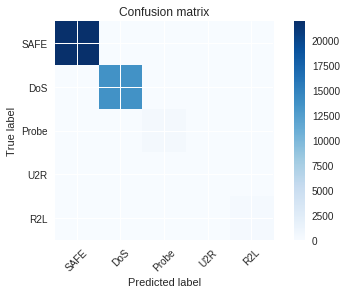

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     13681
           2       1.00      0.97      0.98       424
           3       0.75      0.60      0.67        10
           4       0.90      0.97      0.93       344

   micro avg       1.00      1.00      1.00     36397
   macro avg       0.93      0.91      0.92     36397
weighted avg       1.00      1.00      1.00     36397



In [0]:
from sklearn import metrics
from keras.models import load_model
model3 = load_model(os.path.join(save_path,"cnn1_project3mc1.hdf5"))
predcn = model3.predict(x_test3)
predcn = np.argmax(predcn,axis=1)
y_true = np.argmax(y_test3,axis=1)
score = metrics.precision_score(y_true, predcn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, predcn, average= "weighted")
print("Recall score: {}".format(score))
score_cnmc1 = metrics.f1_score(y_true, predcn, average= "weighted")
print("F1 score: {}".format(score_cnmc1))
#score = metrics.log_loss(y_true, predcn) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,predcn)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['SAFE','DoS','Probe','U2R','R2L'])
plt.show()
print(classification_report(y_true,predcn))

# Comparison

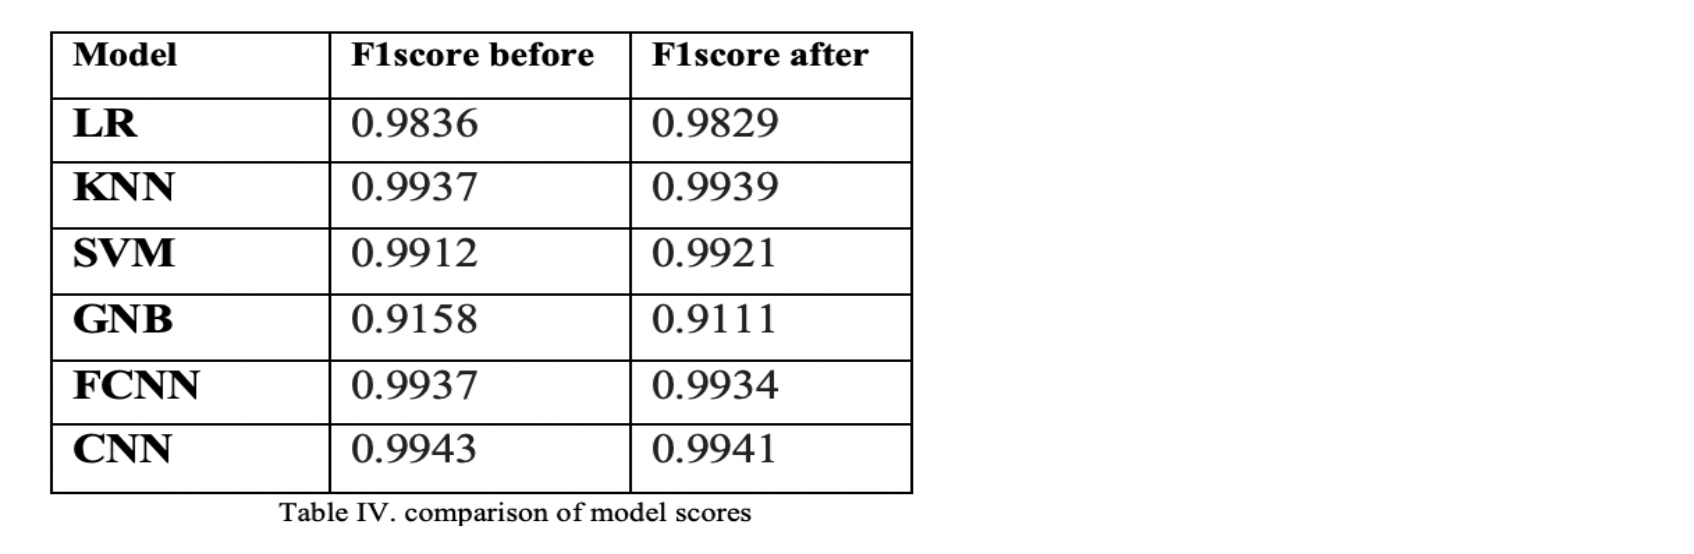

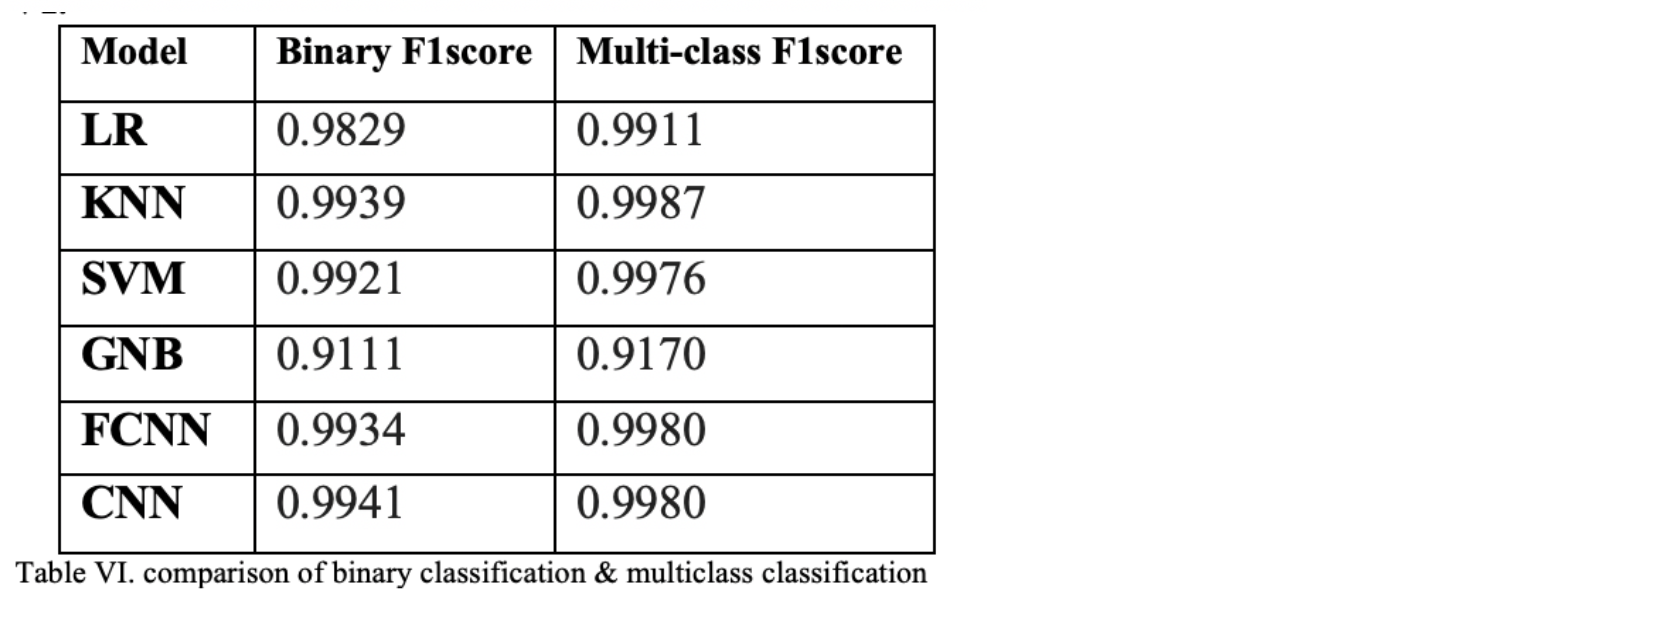

In [15]:
from IPython.display import Image,display
display(Image('/content/Comp1.png',width=600, height=300))
display(Image('/content/Comp2.png',width=600, height=300))

# Conclusion
* While dealing with the big data the feature selection plays a vital role thus understanding the dataset field and preprocess it in the correct format is very important.
* Acuuracy before and after applying the feature extraction remains almost same that means choosing the feature is crucial for ML model.
* Binary and multi-class classification F1score does not have any significant difference

Mini Project 3

Mansi Patel

March 11, 2019

Prof: H.Chen

CSC 215 